In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
uber_df = pd.read_csv("/content/uber_drives_2016.csv")

In [87]:
# get first five records
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ROUND_TRIP*,DIFF,Duration_minutes,month,Year,Day,Hour,Day_Name,Month_Name,DAY/NIGHT*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES,0 days 00:06:00,6.0,1,2016,1,21,Monday,January,Night Ride
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES,0 days 00:13:00,13.0,1,2016,2,20,Tuesday,January,Night Ride
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES,0 days 00:14:00,14.0,1,2016,5,17,Friday,January,Day Ride
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO,0 days 01:07:00,67.0,1,2016,6,14,Saturday,January,Day Ride
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,YES,0 days 00:04:00,4.0,1,2016,6,17,Saturday,January,Day Ride


In [88]:
# get last five records
uber_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ROUND_TRIP*,DIFF,Duration_minutes,month,Year,Day,Hour,Day_Name,Month_Name,DAY/NIGHT*
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,YES,0 days 00:07:00,7.0,12,2016,31,1,Wednesday,December,Day Ride
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NO,0 days 00:18:00,18.0,12,2016,31,13,Wednesday,December,Day Ride
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,YES,0 days 00:35:00,35.0,12,2016,31,15,Wednesday,December,Day Ride
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,NO,0 days 00:18:00,18.0,12,2016,31,21,Wednesday,December,Night Ride
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NO,0 days 01:43:00,103.0,12,2016,31,22,Wednesday,December,Night Ride


In [32]:
uber_df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [33]:
uber_df.shape

(1156, 7)

In [34]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [35]:
uber_df[uber_df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [37]:
uber_df.drop_duplicates(inplace=True)

In [38]:
uber_df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [39]:
uber_df = uber_df.dropna()

In [40]:
uber_df.shape

(652, 7)

In [41]:
uber_df.describe()

,MILES*
count,652.000000
mean,11.198313
std,23.004020
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


<ipython-input-42-814a49acd1ed>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_df["MILES*"])


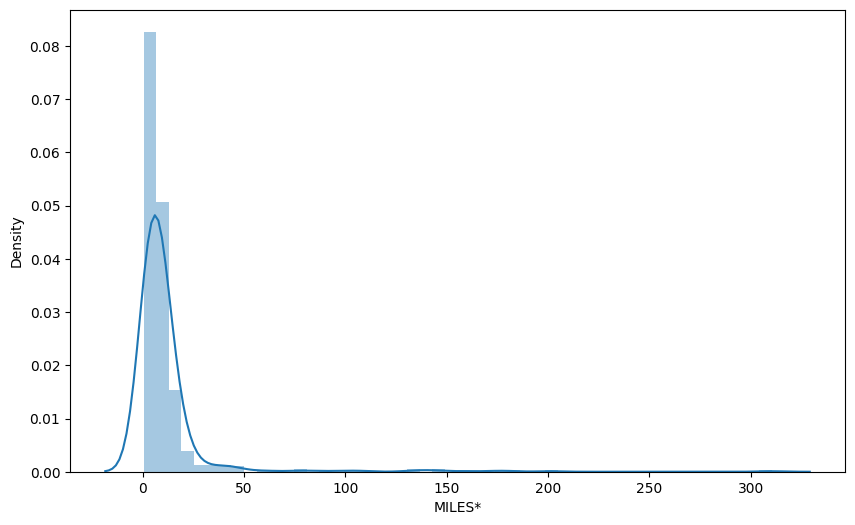

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(uber_df["MILES*"])
plt.show()

In [43]:
uber_df['START*'].nunique()

131

In [44]:
uber_df['START*'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Lake Wellingborough',
       'Fayetteville Street', 'Raleigh', 'Whitebridge', 'Hazelwood',
       'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill', 'Northwoods',
       'Edgehill Farms', 'Eastgate', 'East Elmhurst', 'Long Island City',
       'Katunayaka', 'Colombo', 'Nugegoda', 'Unknown Location',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Preston',
       'Heritage Pines', 'Tanglewood', 'Waverly Place', 'Wayne Ridge',
       'Westpark Place', 'East Austin', 'The Drag', 'South Congress',
       'Georgian Acres', 'North Austin', 'West University', 'Austin',
       'Katy', 'Sharpstown', 'Sugar Land', 'Galveston', 'Port Bolivar',
       'Washington Avenue',

In [45]:
uber_df['STOP*'].nunique()

137

In [46]:
uber_df['STOP*'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary',
       'Morrisville', 'New York', 'Queens', 'East Harlem', 'NoMad',
       'Midtown', 'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Queens County', 'Gulfton', 'Downtown',
       'Houston', 'Jamestown Court', 'Durham', 'Whitebridge', 'Raleigh',
       'Umstead', 'Hazelwood', 'Westpark Place', 'Meredith Townes',
       'Leesville Hollow', 'Apex', 'Chapel Hill', 'Williamsburg Manor',
       'Macgregor Downs', 'Edgehill Farms', 'Walnut Terrace',
       'Midtown West', 'Long Island City', 'Jamaica', 'Unknown Location',
       'Colombo', 'Nugegoda', 'Katunayaka', 'Islamabad', 'R?walpindi',
       'Noorpur Shahan', 'Heritage Pines', 'Tanglewood', 'Waverly Place',
       'Wayne Ridge', 'Northwoods', 'Depot Historic District',
       'West University', 'Congress Ave District',
       'Convention Center District', 'North Austin', 'The Drag',
       'Coxville', 'South Congress', 'Katy', 'Alief', 'Sharps

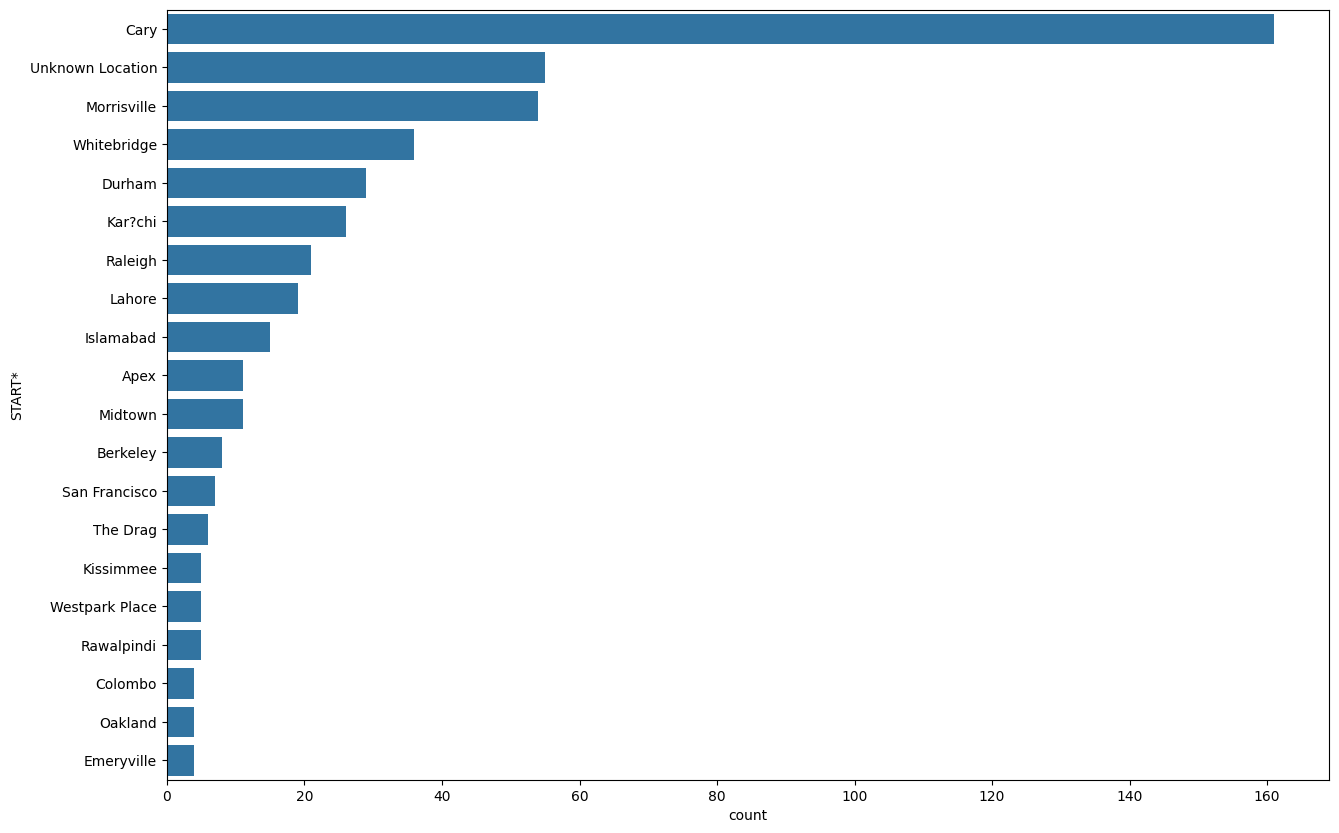

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(y="START*",order= pd.value_counts(uber_df['START*']).iloc[:20].index, data=uber_df)
plt.show()

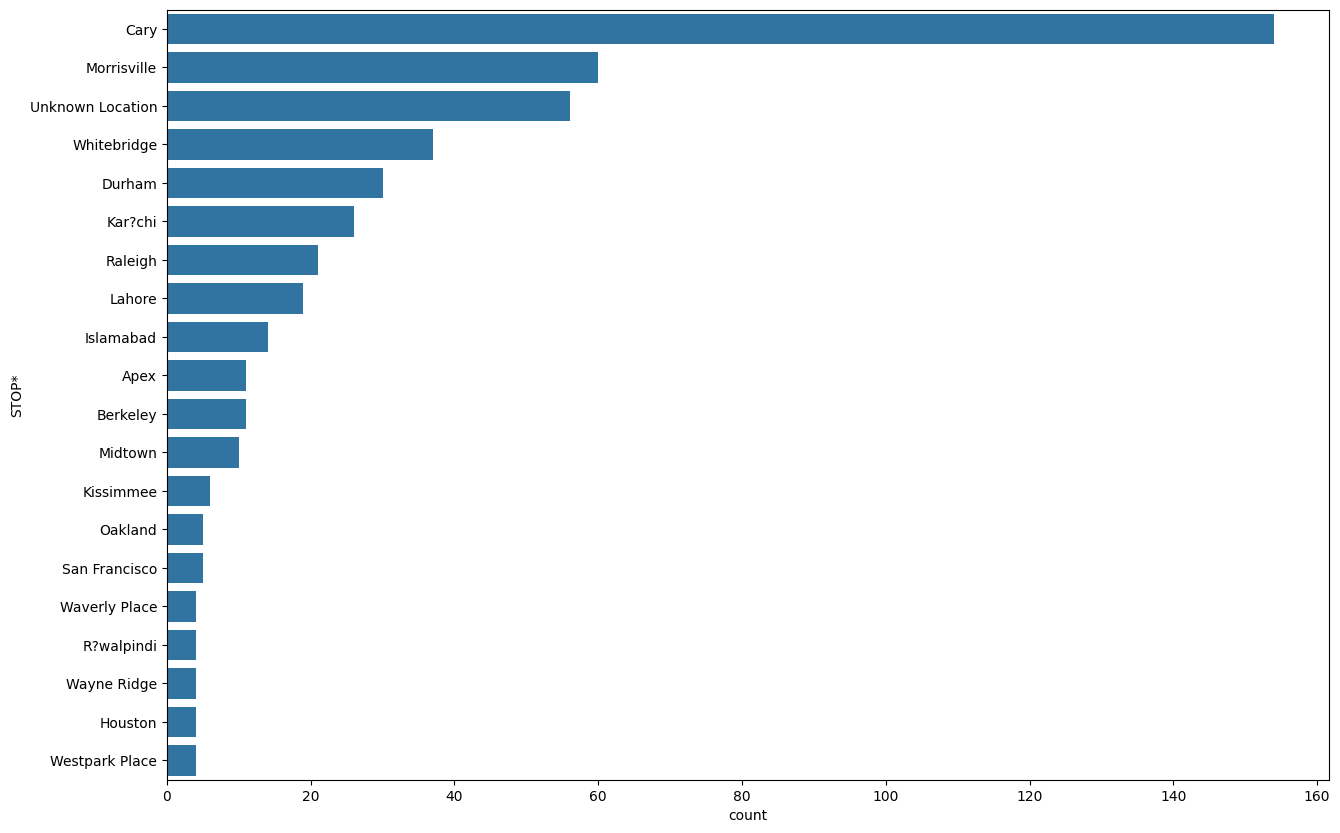

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(y="STOP*",order= pd.value_counts(uber_df['STOP*']).iloc[:20].index, data=uber_df)
plt.show()

<ipython-input-49-7847a3eb9ca5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(uber_df['ROUND_TRIP*'], order=uber_df['ROUND_TRIP*'].value_counts().index, palette='viridis')


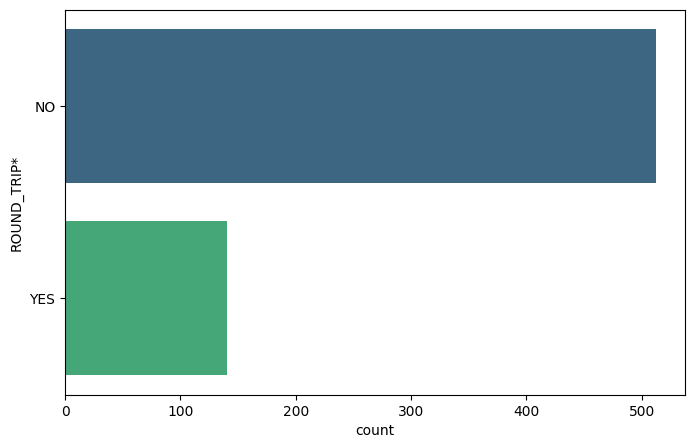

In [49]:
plt.figure(figsize=(8,5))
def round(x):
    if x['START*'] == x['STOP*']:
        return 'YES'
    else:
        return 'NO'

uber_df['ROUND_TRIP*'] = uber_df.apply(round, axis=1)

sns.countplot(uber_df['ROUND_TRIP*'], order=uber_df['ROUND_TRIP*'].value_counts().index, palette='viridis')
plt.show()

In [50]:
uber_df.loc[:, 'START_DATE*'] = uber_df['START_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))
uber_df.loc[:, 'END_DATE*'] = uber_df['END_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))

<ipython-input-50-3b59047c05b8>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  uber_df.loc[:, 'START_DATE*'] = uber_df['START_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))
<ipython-input-50-3b59047c05b8>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  uber_df.loc[:, 'START_DATE*'] = uber_df['START_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))
<ipython-input-50-3b59047c05b8>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  uber_df.loc[:, 'END_DATE*'] = uber_df['END_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y

In [56]:
uber_df['END_DATE*']

0      2016-01-01 21:17:00
2      2016-01-02 20:38:00
3      2016-01-05 17:45:00
4      2016-01-06 15:49:00
5      2016-01-06 17:19:00
               ...        
1150   2016-12-31 01:14:00
1151   2016-12-31 13:42:00
1152   2016-12-31 15:38:00
1153   2016-12-31 21:50:00
1154   2016-12-31 23:51:00
Name: END_DATE*, Length: 652, dtype: datetime64[ns]

In [51]:
uber_df['DIFF'] = uber_df['END_DATE*'] - uber_df['START_DATE*']

In [60]:
# Calculate duration in minutes for each row
uber_df['Duration_minutes'] = (uber_df['END_DATE*'] - uber_df['START_DATE*']).dt.total_seconds() / 60

# Display the result
print(uber_df[['START_DATE*', 'END_DATE*', 'Duration_minutes']])

             START_DATE*           END_DATE*  Duration_minutes
0    2016-01-01 21:11:00 2016-01-01 21:17:00               6.0
2    2016-01-02 20:25:00 2016-01-02 20:38:00              13.0
3    2016-01-05 17:31:00 2016-01-05 17:45:00              14.0
4    2016-01-06 14:42:00 2016-01-06 15:49:00              67.0
5    2016-01-06 17:15:00 2016-01-06 17:19:00               4.0
...                  ...                 ...               ...
1150 2016-12-31 01:07:00 2016-12-31 01:14:00               7.0
1151 2016-12-31 13:24:00 2016-12-31 13:42:00              18.0
1152 2016-12-31 15:03:00 2016-12-31 15:38:00              35.0
1153 2016-12-31 21:32:00 2016-12-31 21:50:00              18.0
1154 2016-12-31 22:08:00 2016-12-31 23:51:00             103.0

[652 rows x 3 columns]


In [61]:
uber_df['Duration_minutes'].describe()

count    652.000000
mean      23.395706
std       25.789348
min        2.000000
25%       11.000000
50%       17.500000
75%       28.000000
max      330.000000
Name: Duration_minutes, dtype: float64

In [62]:
uber_df['month'] = pd.to_datetime(uber_df['START_DATE*']).dt.month
uber_df['Year'] = pd.to_datetime(uber_df['START_DATE*']).dt.year
uber_df['Day'] = pd.to_datetime(uber_df['START_DATE*']).dt.day
uber_df['Hour'] = pd.to_datetime(uber_df['START_DATE*']).dt.hour

In [63]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ROUND_TRIP*,DIFF,Duration_minutes,month,Year,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES,0 days 00:06:00,6.0,1,2016,1,21
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES,0 days 00:13:00,13.0,1,2016,2,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES,0 days 00:14:00,14.0,1,2016,5,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO,0 days 01:07:00,67.0,1,2016,6,14
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,YES,0 days 00:04:00,4.0,1,2016,6,17


In [65]:
uber_df['Day'].value_counts()

21    31
29    30
19    30
18    30
4     28
12    27
28    26
8     25
1     25
22    24
7     23
20    22
6     22
14    21
11    21
5     21
3     20
26    20
27    20
25    19
10    19
2     18
24    18
13    17
15    16
17    16
16    15
23    14
30    12
9     12
31    10
Name: Day, dtype: int64

In [68]:
uber_df['Day'].unique()

array([ 1,  2,  5,  6,  7, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 26, 27,
       28, 29, 30,  4,  8,  9, 16, 17, 22, 24, 25,  3, 31, 23])

In [69]:
uber_df['Day_Name'] = pd.to_datetime(uber_df['Day'], format='%d').dt.day_name()
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ROUND_TRIP*,DIFF,Duration_minutes,month,Year,Day,Hour,Day_Name
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES,0 days 00:06:00,6.0,1,2016,1,21,Monday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES,0 days 00:13:00,13.0,1,2016,2,20,Tuesday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES,0 days 00:14:00,14.0,1,2016,5,17,Friday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO,0 days 01:07:00,67.0,1,2016,6,14,Saturday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,YES,0 days 00:04:00,4.0,1,2016,6,17,Saturday


In [71]:
uber_df['Month_Name'] = pd.to_datetime(uber_df['month'], format='%m').dt.month_name()
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ROUND_TRIP*,DIFF,Duration_minutes,month,Year,Day,Hour,Day_Name,Month_Name
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES,0 days 00:06:00,6.0,1,2016,1,21,Monday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES,0 days 00:13:00,13.0,1,2016,2,20,Tuesday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES,0 days 00:14:00,14.0,1,2016,5,17,Friday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO,0 days 01:07:00,67.0,1,2016,6,14,Saturday,January
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,YES,0 days 00:04:00,4.0,1,2016,6,17,Saturday,January


In [72]:
uber_df['month'].value_counts()

12    134
2      82
6      72
3      71
11     60
1      59
4      50
5      46
7      46
10     20
8      12
Name: month, dtype: int64

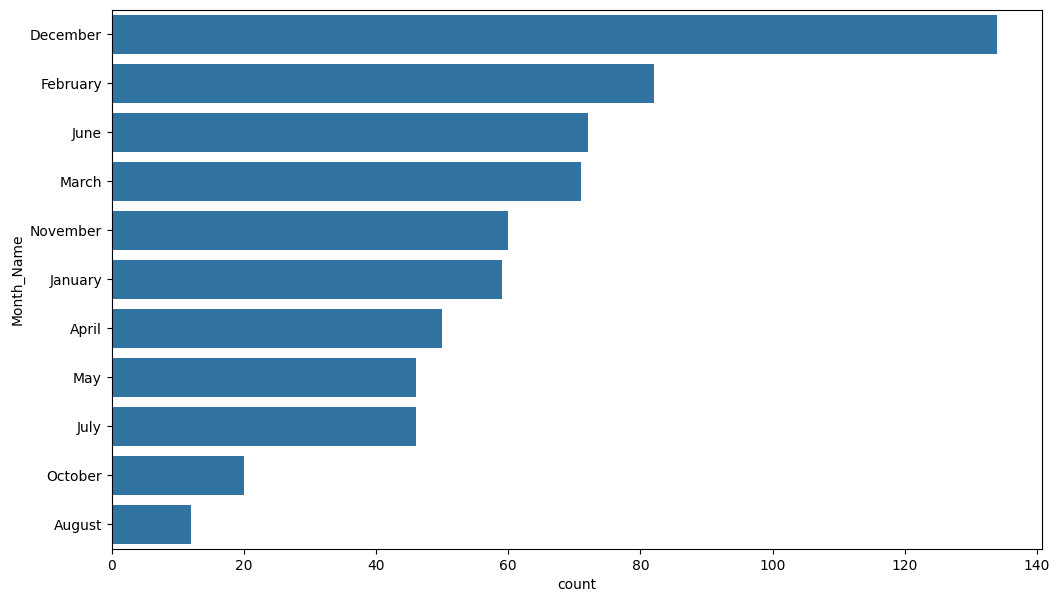

In [73]:
plt.figure(figsize=(12,7))
sns.countplot(uber_df['Month_Name'],order=pd.value_counts(uber_df['Month_Name']).index)
plt.show()

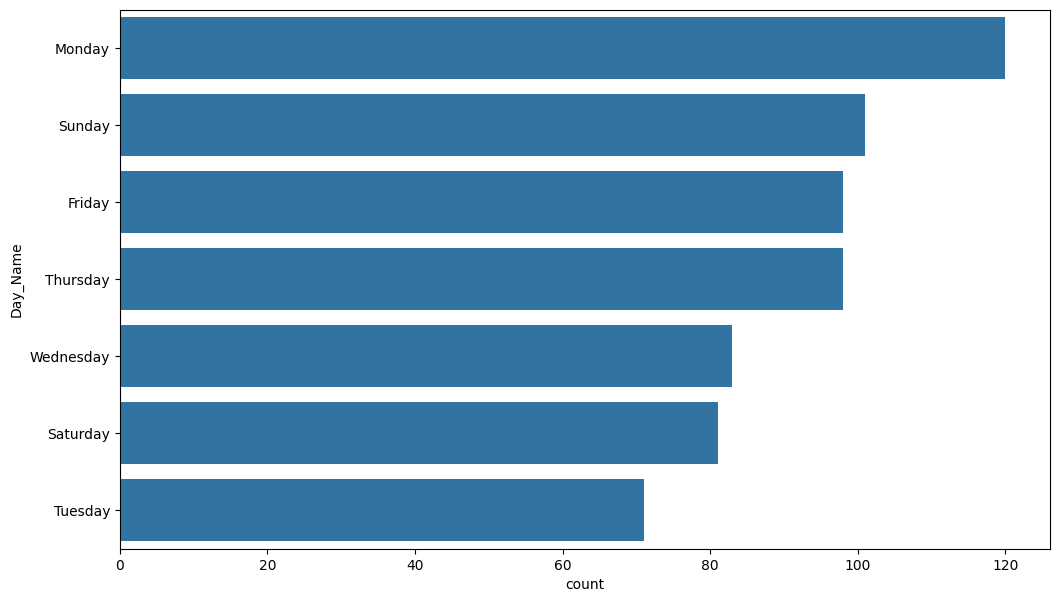

In [74]:
plt.figure(figsize=(12,7))
sns.countplot(uber_df['Day_Name'],order=pd.value_counts(uber_df['Day_Name']).index)
plt.show()

In [75]:
uber_df.groupby('Month_Name').mean()['MILES*'].sort_values(ascending = False)

<ipython-input-75-acfe614e3ca4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uber_df.groupby('Month_Name').mean()['MILES*'].sort_values(ascending = False)


Month_Name
October     24.840000
April       21.898000
March       20.505634
July        10.615217
November    10.590000
February     8.868293
January      8.486441
May          7.793478
June         7.376389
August       7.341667
December     6.898507
Name: MILES*, dtype: float64

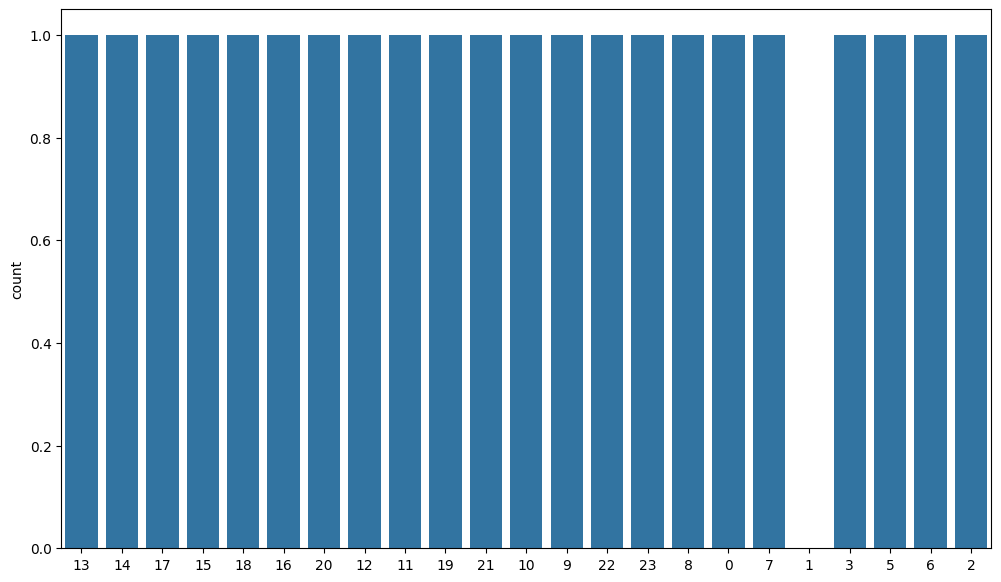

In [76]:
plt.figure(figsize=(12,7))
sns.countplot(uber_df['Hour'],order=pd.value_counts(uber_df['Hour']).index)
plt.show()

<ipython-input-78-a923c668d4da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(uber_df['DAY/NIGHT*'], palette='Set2' , order = uber_df['DAY/NIGHT*'].value_counts().index)


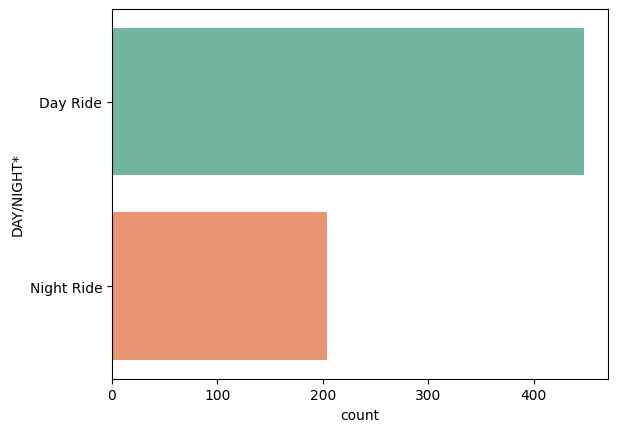

In [78]:
a = pd.to_datetime(['18:00:00']).time
uber_df['DAY/NIGHT*'] = uber_df.apply(lambda x : 'Night Ride' if x['START_DATE*'].time() > a else 'Day Ride', axis=1)
sns.countplot(uber_df['DAY/NIGHT*'], palette='Set2' , order = uber_df['DAY/NIGHT*'].value_counts().index)
plt.show()

In [80]:
uber_df['CATEGORY*'].value_counts()

Business    646
Personal      6
Name: CATEGORY*, dtype: int64

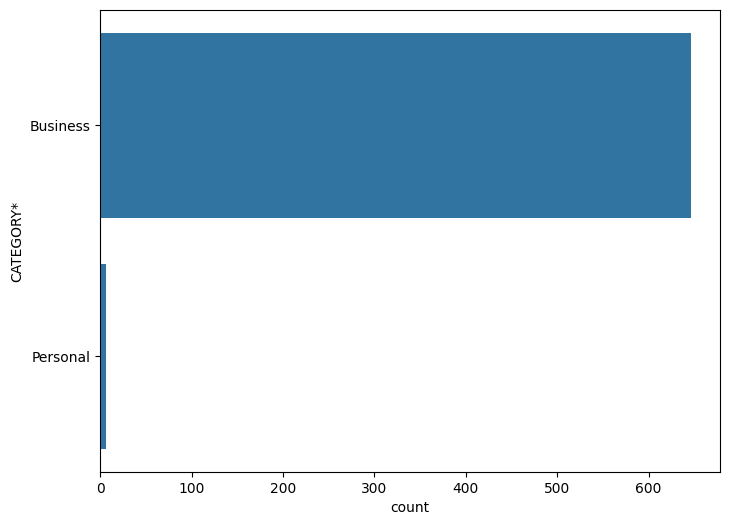

In [81]:
plt.figure(figsize=(8,6))
sns.countplot(uber_df['CATEGORY*'])
plt.show()

In [82]:
uber_df['PURPOSE*'].value_counts()

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

<ipython-input-83-11c84239268b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(uber_df['PURPOSE*'], order=uber_df['PURPOSE*'].value_counts().index, palette='Set2')


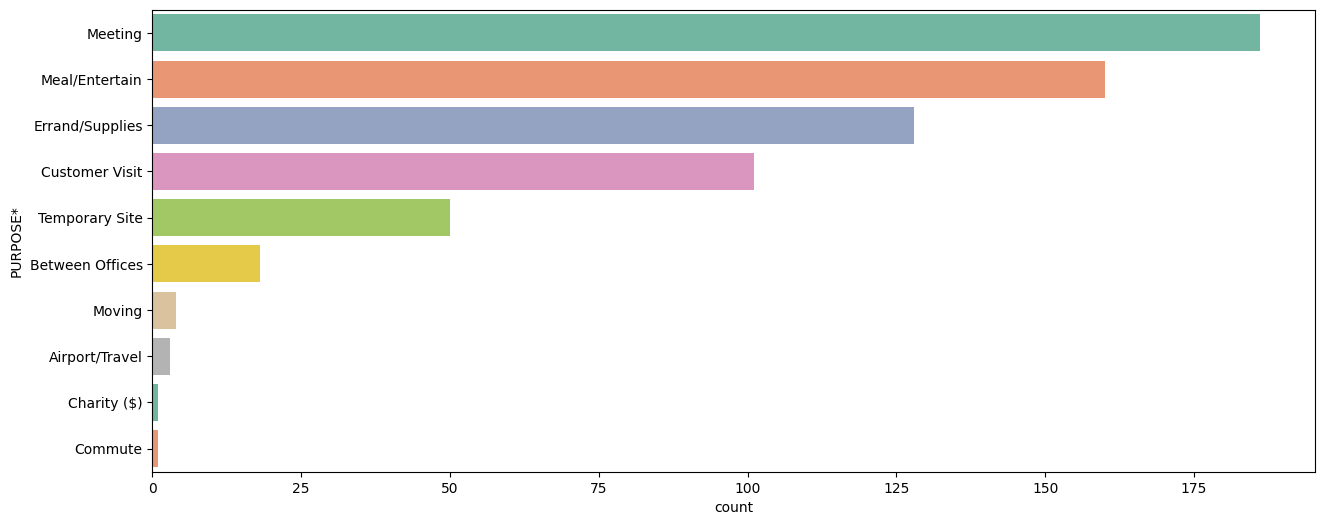

In [83]:
plt.figure(figsize=(15,6))
sns.countplot(uber_df['PURPOSE*'], order=uber_df['PURPOSE*'].value_counts().index, palette='Set2')
plt.show()

In [84]:
uber_df.groupby('PURPOSE*').mean()['MILES*'].sort_values(ascending = False)

<ipython-input-84-08a8a8391f0e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uber_df.groupby('PURPOSE*').mean()['MILES*'].sort_values(ascending = False)


PURPOSE*
Commute            180.200000
Customer Visit      20.688119
Meeting             15.276344
Charity ($)         15.100000
Between Offices     10.944444
Temporary Site      10.474000
Meal/Entertain       5.698125
Airport/Travel       5.500000
Moving               4.550000
Errand/Supplies      3.968750
Name: MILES*, dtype: float64

In [85]:
uber_df.groupby('PURPOSE*').sum()['MILES*'].sort_values(ascending = False)

<ipython-input-85-6f517e901aaa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uber_df.groupby('PURPOSE*').sum()['MILES*'].sort_values(ascending = False)


PURPOSE*
Meeting            2841.4
Customer Visit     2089.5
Meal/Entertain      911.7
Temporary Site      523.7
Errand/Supplies     508.0
Between Offices     197.0
Commute             180.2
Moving               18.2
Airport/Travel       16.5
Charity ($)          15.1
Name: MILES*, dtype: float64

In [86]:
uber_df.groupby('CATEGORY*').sum()['MILES*'].sort_values(ascending = False)

<ipython-input-86-53769597c405>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uber_df.groupby('CATEGORY*').sum()['MILES*'].sort_values(ascending = False)


CATEGORY*
Business    7087.8
Personal     213.5
Name: MILES*, dtype: float64